### Exercise 30 Numpy

In [1]:
import numpy as np

## Create a 3x3 NumPyarray named `matrix`
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])
print(f"matrix:\n{matrix}")

print("-"*40)
## Calculate the sum of all elements in the matrix
print(f"Summation of all elements: {np.sum(matrix)}")

print("-"*40)
## Find the maximum value in the matrix and provide the value and its indices (row and column)
print(f"Maximum Element's Value: {np.max(matrix)}")
## Version I : finding indices of maximum element in each dimenstion using `argmax` and `unravel_index`
max_index = np.argmax(matrix)
row, col = np.unravel_index(max_index, matrix.shape)
print(f"Maximum Element's Indices (row, col): {row, col}")
## Version II  : finding indices of maximum element in each dimenstion using `max` and `where`
row, col = np.where(matrix == np.max(matrix))
print(f"Maximum Element's Indices (row, col): ({row[0]}, {col[0]})")

print("-"*40)
## Extract the second column of the matrix and provide it as a separate NumPyarray
second_col = matrix[:,1]
print(f"The second column of the matrix: {second_col}")

print("-"*40)
## Replace all even numbers in the matrix with -1
rep_mat = np.where(matrix % 2 == 0, -1, matrix)
print(f"Modified Matrix:\n{rep_mat}")

print("-"*40)
## Reshape the matrix into a 1D array
arr_1d = matrix.flatten()
print(f"Reshaped matrix: {arr_1d}")
print(f"The shape of reshaped matrix: {arr_1d.shape}")

print("-"*40)
## Create a new 2x2 NumPyarray named submatrix by slicing the matrix (elements 5, 6, 8, 9)
submatrix = matrix[1:,1:]
print(f"submatrix: \n{submatrix}")
print(f"The shape of submatrix: {submatrix.shape}")

print("-"*40)
## Calculate the mean value of all elements in the submatrixand provide the result
mean_submat = np.mean(submatrix)
print(f"Mean of submatrix: {mean_submat}")


matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
----------------------------------------
Summation of all elements: 45
----------------------------------------
Maximum Element's Value: 9
Maximum Element's Indices (row, col): (2, 2)
Maximum Element's Indices (row, col): (2, 2)
----------------------------------------
The second column of the matrix: [2 5 8]
----------------------------------------
Modified Matrix:
[[ 1 -1  3]
 [-1  5 -1]
 [ 7 -1  9]]
----------------------------------------
Reshaped matrix: [1 2 3 4 5 6 7 8 9]
The shape of reshaped matrix: (9,)
----------------------------------------
submatrix: 
[[5 6]
 [8 9]]
The shape of submatrix: (2, 2)
----------------------------------------
Mean of submatrix: 7.0




### Exercise 31 Pandas + Matplotlib
Analyze the students dataset based on the details taught in our class. (with Pandas and Matplotlib)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("student.csv")
pd.set_option('display.max_columns', None) # to print all the columns)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0.0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,course,father,1,2,0.0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,other,mother,1,2,3.0,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,home,mother,1,3,0.0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,home,father,1,2,0.0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         389 non-null    object 
 2   age         389 non-null    float64
 3   address     389 non-null    object 
 4   famsize     391 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        391 non-null    object 
 9   Fjob        392 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    394 non-null    object 
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    386 non-null    float64
 15  schoolsup   390 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        388 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">
<br>
در دیتاست داده تکراری وجود ندارد:
</div>

In [5]:
## Check if there is duplicated: The result shows there is no duplicated data
df.duplicated().sum()

0

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,389.000000,395.000000,395.000000,395.000000,395.000000,386.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.709512,2.749367,2.521519,1.448101,2.035443,0.341969,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.278464,1.094735,1.088201,0.697505,0.839240,0.750515,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000



<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">
<br>
تعداد مقادیر غیر null، تعداد مقادیر یونیک، مد و فراوانی مد را برای داده های با  dtype='object' در ادامه مشاهده می کنید:
<br>

</div>

In [7]:
df.describe(include=["object"])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,389,389,391,395,391,392,395,394,390,395,388,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,205,301,278,354,138,215,145,272,339,242,212,201,314,375,329,263


<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">
<br>
ستون هایی که مقدار null دارند به همراه تعداد null هر ستون:
</div>

In [8]:
coun_null = df.isnull().sum() 
coun_null[coun_null > 0]

sex          6
age          6
address      6
famsize      4
Mjob         4
Fjob         3
guardian     1
failures     9
schoolsup    5
paid         7
dtype: int64

<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">
<br>
اگر دقت کنید عدد 6 در تعداد مقادیر null بین ستون های مختلف سه بار تکرار شده است. برای بررسی بیشتر، داده هایی که در ستون `sex` دارای مقدار null هستند را به صورت کامل در ادامه آورده ایم:
</div>

In [9]:
df[df['sex'].isnull()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
13,GP,NaN,NaN,NaN,GT3,T,4,3,teacher,other,course,mother,2,2,NaN,NaN,yes,NaN,no,yes,yes,yes,no,5,4,3,1,2,3,2,10,10,11
14,GP,NaN,NaN,NaN,GT3,A,2,2,other,other,home,other,1,3,NaN,no,yes,NaN,no,yes,yes,yes,yes,4,5,2,1,1,3,0,14,16,16
15,GP,NaN,NaN,NaN,GT3,T,4,4,health,other,home,mother,1,1,NaN,no,yes,no,no,yes,yes,yes,no,4,4,4,1,2,2,4,14,14,14
16,GP,NaN,NaN,NaN,GT3,T,4,4,services,services,reputation,mother,1,3,0.0,no,yes,yes,yes,yes,yes,yes,no,3,2,3,1,2,2,6,13,14,14
17,GP,NaN,NaN,NaN,GT3,T,3,3,other,other,reputation,mother,3,2,0.0,yes,yes,no,yes,yes,yes,no,no,5,3,2,1,1,4,4,8,10,10
18,GP,NaN,NaN,NaN,GT3,T,3,2,services,services,course,mother,1,1,3.0,no,yes,no,yes,yes,yes,yes,no,5,5,5,2,4,5,16,6,5,5


<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">
<br>
شش داده ای که مقدار ستون `sex` در آن ها null است، مقادیر ستون های `age` و `address` هم null می باشند.
<br>
در بقیه ی ستون های این شش داده نیز مقادیر null وجود دارد.
<br>
یک رویه در پاکسازی داده ها می تواند این باشد که این داده را حذف کنیم. اما ما در اینجا از پر کردن داده های null استفاده کرده ایم.
<br>
در ستون های numerical از میانگین و در ستون های nominal و ordinal از مد به عنوان جایگزین مقادیر null استفاده می کنیم.
در اینجا ستون های دارای null همگی nominal یا ordinal بوده اند بنابراین فقط از مد استفاده کرده ایم.
</div>

In [10]:
## Filling null
def filling_null(data_col):
        return data_col.fillna(data_col.mode()[0])

df = df.apply(filling_null)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    float64
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    395 non-null    float64
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">
<h4>نمایش تعداد  value های منحصربفرد در هر ستون object با استفاده از نموادرهای pie</h4>
</div>

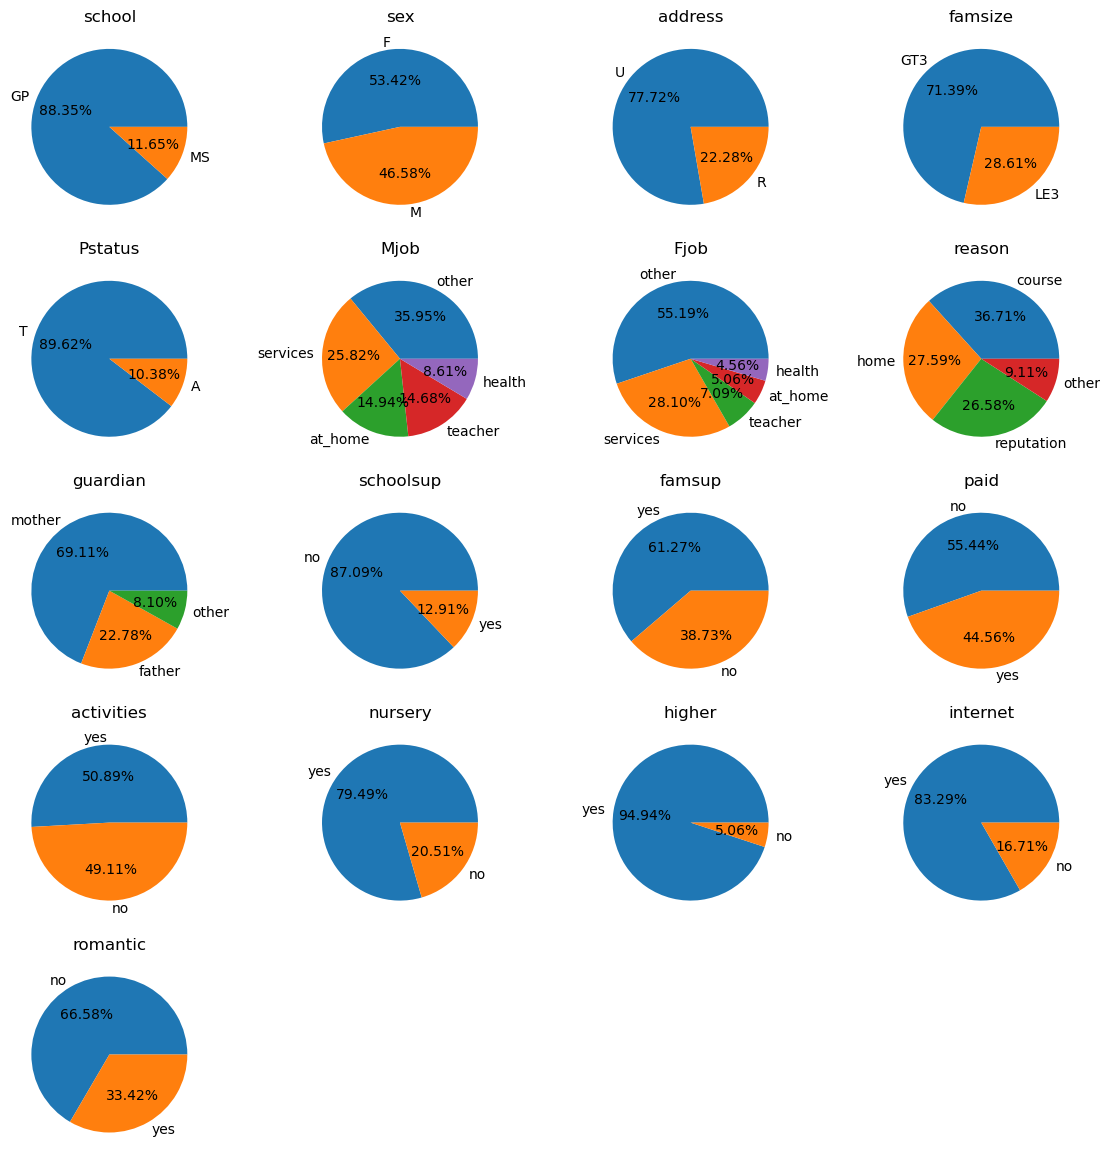

In [11]:
## Represent categorical columns  using histogram
obj_cols = df.select_dtypes(include='object').columns

plt.figure(figsize=(12,12))

for i, col in enumerate(obj_cols):
    plt.subplot(5, 4, i+1)
    plt.tight_layout(pad=1.2)
    plt.pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct="%1.2f%%")
    plt.title(label=col)
plt.show()

<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">
<h3>بررسی ستون های با dtype عددی در دیتاست</h3>
</div>

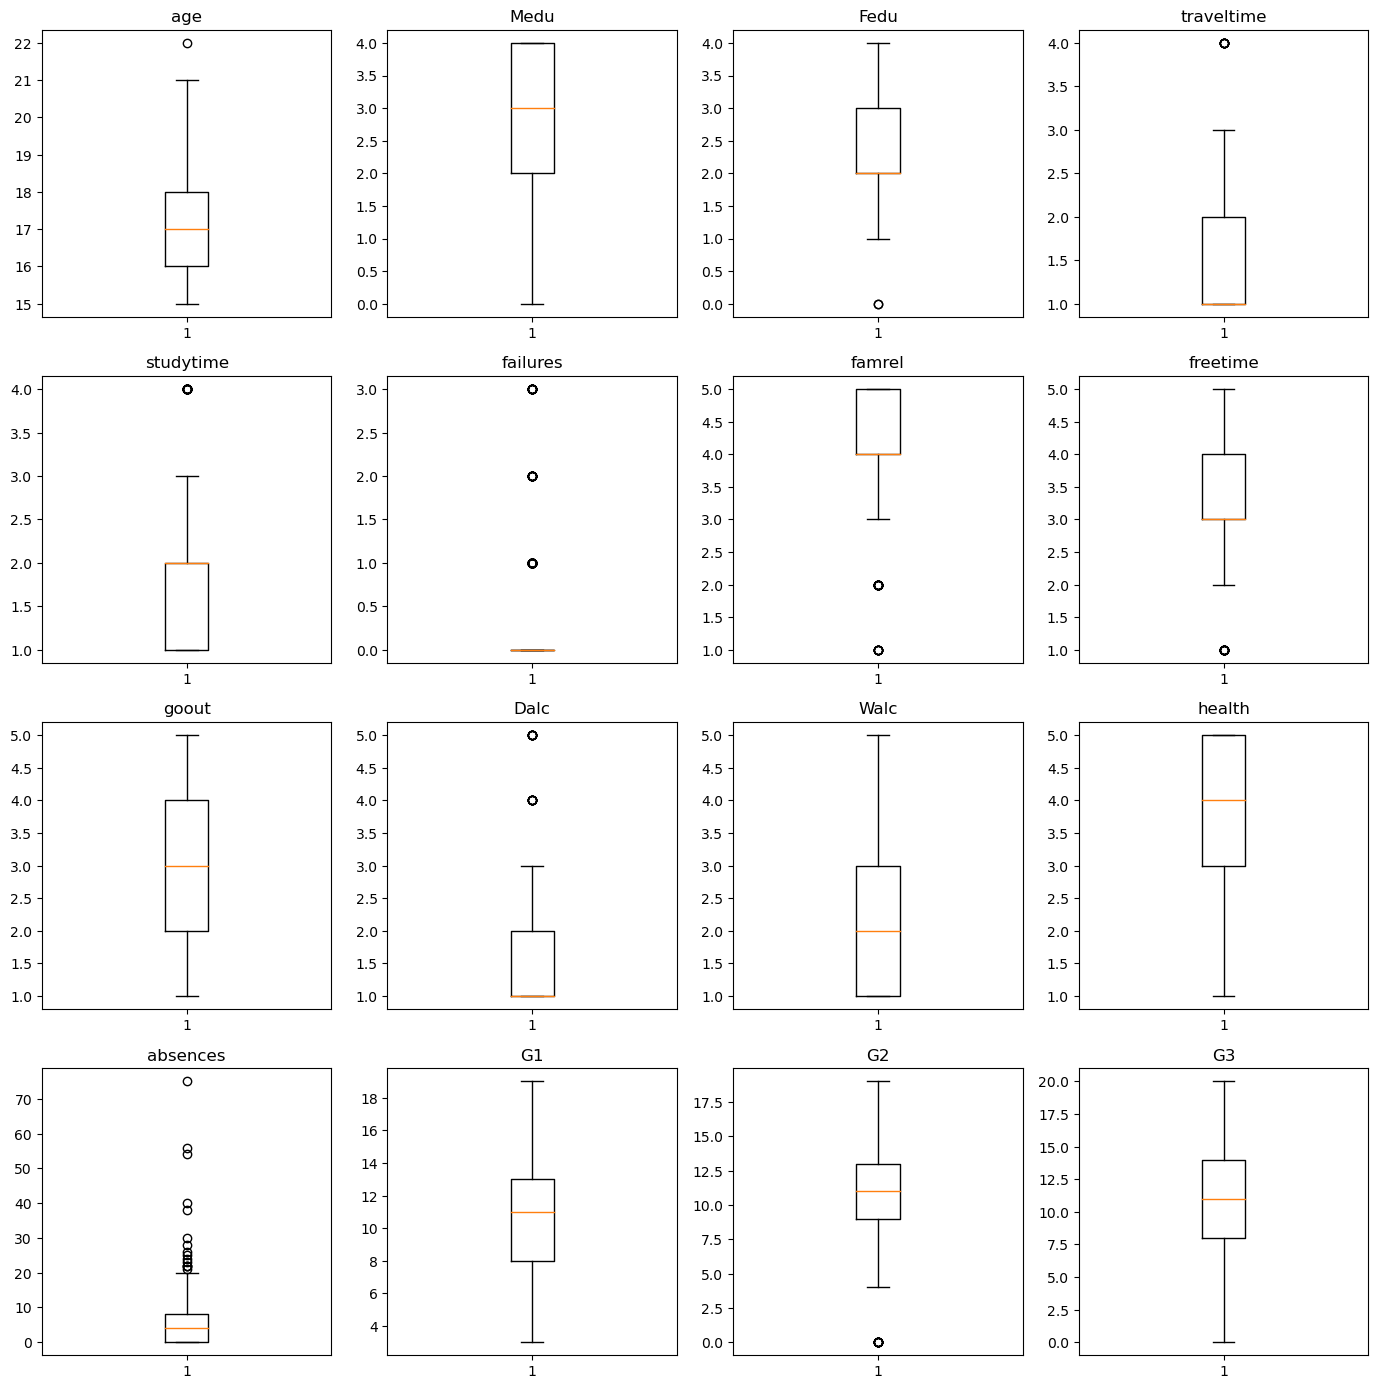

In [12]:
## Represent Numerical columns 
num_cols = df.select_dtypes(include=['int', 'float']).columns

plt.figure(figsize=(14,14))

for i, col in enumerate(num_cols):
    plt.subplot(4, 4, i+1)
    plt.tight_layout(pad=1.1)
    plt.boxplot(df[col])
    plt.title(label=col)
plt.show()

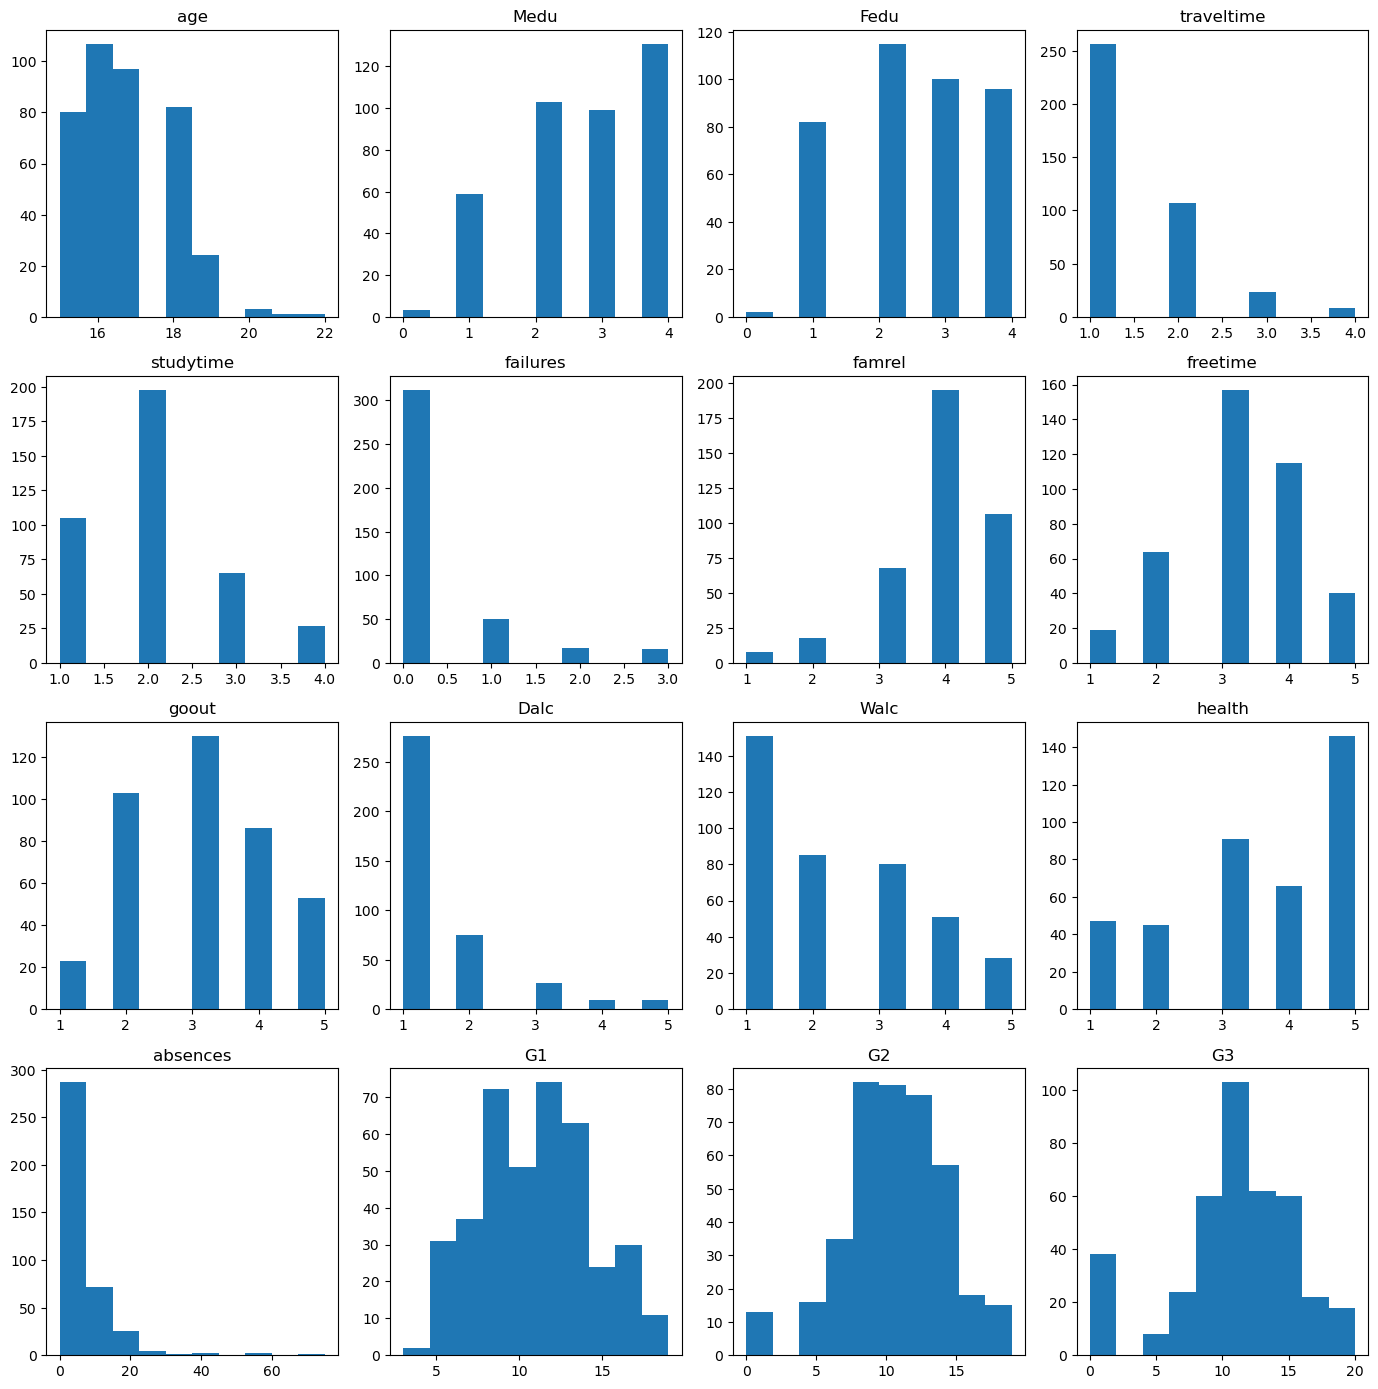

In [13]:
## Represent Numerical columns 
num_cols = df.select_dtypes(include=['int', 'float']).columns

plt.figure(figsize=(14,14))

for i, col in enumerate(num_cols):
    plt.subplot(4, 4, i+1)
    plt.tight_layout(pad=1.1)
    plt.hist(df[col])
    plt.title(label=col)
plt.show()

<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">

<h4>بررسی نمودار نمرات دانش آموزان</h4>
مقدار min و max برای ستون های G1، G2 و G3 نشان میدهد نمرات valid هستند یعنی بین 0 تا 20 هستند
<br>
می توانیم نمودار نمرات دانش آموزان را در هر درس رسم کنیم.
<br>
</div>

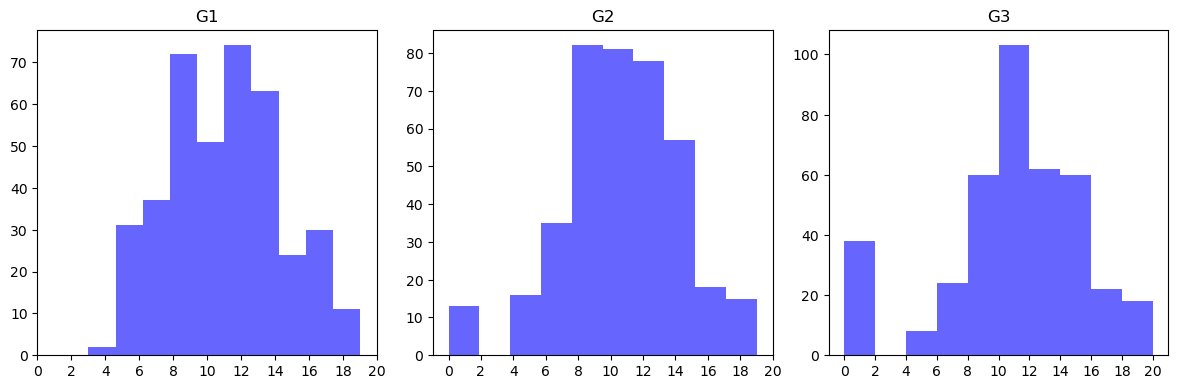

In [14]:
## plot grades columns:
g_cols = ['G1', 'G2', 'G3']

plt.figure(figsize=(12,4))
for i, col in enumerate(g_cols):
    plt.subplot(1, 3, i+1)
    plt.tight_layout(pad=1.1)
    plt.hist(df[col], color='blue', alpha=0.6)
    plt.xticks(np.arange(0, 21, step=2))
    plt.title(label=col)
plt.show()


<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">
<h4>بررسی رابطه بین جنسیت دانش آموزان و نمرات آنها :</h4>
در ادامه نمرات سه ستون G1، G2 و G3 را به تفکیک جنسیت دانش آموز نمایش می دهیم:
<br>

</div>

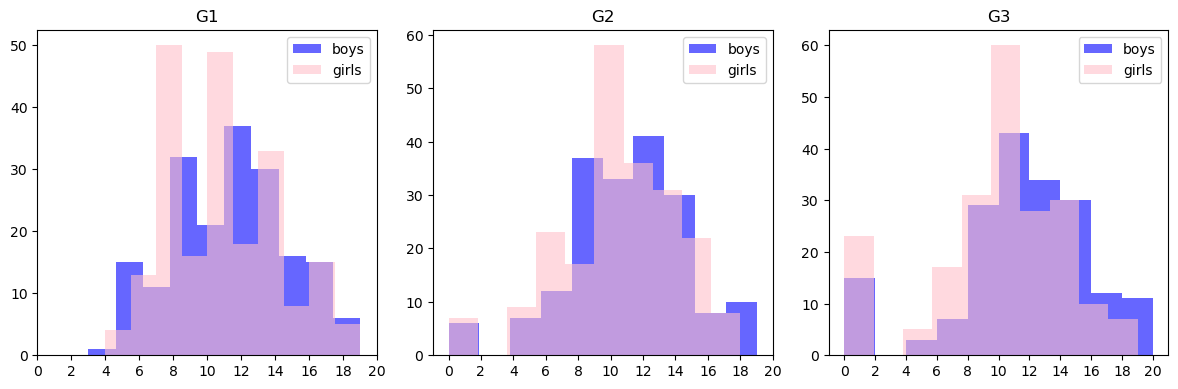

In [15]:
## plot the grades of students based on their sex:
g_cols = ['G1', 'G2', 'G3']

plt.figure(figsize=(12,4))
for i, col in enumerate(g_cols):
    plt.subplot(1, 3, i+1)
    plt.tight_layout(pad=1.1)
    # plotting histogram associated with 'M' sex
    plt.hist(x= df[df['sex'] == 'M'][col], color='blue', alpha=0.6, label='boys')
    # plotting histogram associated with 'F' sex
    plt.hist(x= df[df['sex'] == 'F'][col], color='pink', alpha=0.6, label='girls')
    plt.xticks(np.arange(0, 21, step=2))
    plt.title(label=col)
    plt.legend()
plt.show()

In [16]:
df['sex'].value_counts()

F    211
M    184
Name: sex, dtype: int64

<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">
در G3 پسرها نمرات بالاتر بیشتری بدست آورده اند
<br>
این مساله را با میانگین هم بررسی می کنیم: به  صورت میانگین نمرات پسرها از دخترها در هر سه ستون بین نیم تا 1 نمره بیشتر شده است.
</div>

In [17]:
df.pivot_table(['G1', 'G2', 'G3'],
               ['sex'],
               aggfunc='mean')

,G1,G2,G3
sex,,,
F,10.611374,10.388626,9.976303
M,11.250000,11.086957,10.918478


<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">
<h4>بررسی رابطه بین کلاس های تقویتی و نمرات دانش آموزان:</h4>
توزیع نمودار در هر دو حالت کلاس اضافه داشتن/نداشتن برای هر سه grade تقریبا یکسان شده است. بنابراین از روی نمودار نمی توانیم با اطمینان بگوییم کلاس های اضافه تاثیر مثبت داشته اند.
<br>
رنگ آبی دانش آموزانی را نشان می دهد که کلاس اضافه داشته اند.
</div>

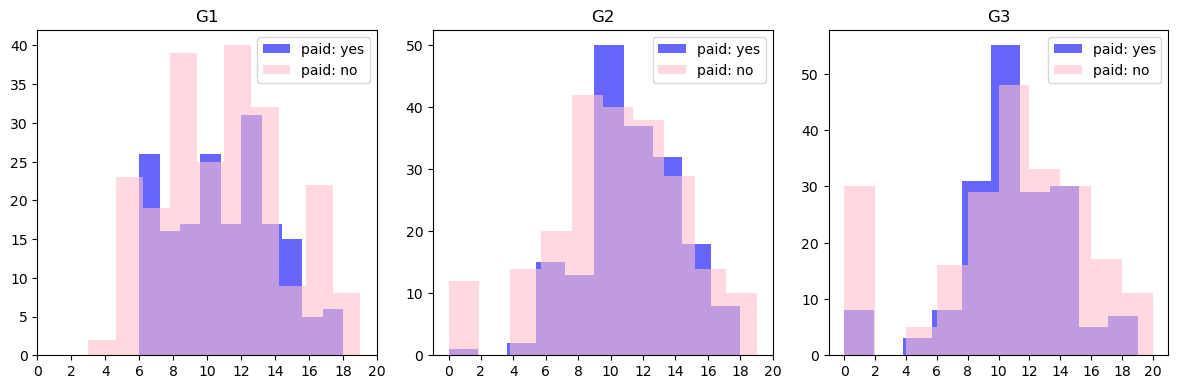

In [18]:
g_cols = ['G1', 'G2', 'G3']

plt.figure(figsize=(12,4))
for i, col in enumerate(g_cols):
    plt.subplot(1, 3, i+1)
    plt.tight_layout(pad=1.1)
    # plotting histogram associated with 'yes' paid
    plt.hist(x= df[df['paid'] == 'yes'][col], color='blue', alpha=0.6, label='paid: yes')
    # plotting histogram associated with 'no' paid
    plt.hist(x= df[df['paid'] == 'no'][col], color='pink', alpha=0.6, label='paid: no')
    plt.xticks(np.arange(0, 21, step=2))
    plt.title(label=col)
    plt.legend()
plt.show()

<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">
<br>
میانگین نمرات در حالت داشتن کلاس های اضافه افزایش داده است. می توان از تست های آماری برای بررسی معنادار بودن این اختلاف ها استفاده کرد:
</div>

In [19]:
df.pivot_table(['G1', 'G2', 'G3'],
               ['paid'],
               aggfunc='mean')

,G1,G2,G3
paid,,,
no,10.835616,10.410959,10.068493
yes,11.000000,11.090909,10.846591


<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">

<h4>بررسی رابطه بین مصرف الکل در آخر هفته و نمرات دانش آموزان:
</h4>
به دلیل اینکه ستون `Walc` پنج مقدار منحصربفرد دارد، مقایسه ی نمودار هیستوگرام به ازای این پنج مقدار خیلی واضح نخواهد بود
</div>

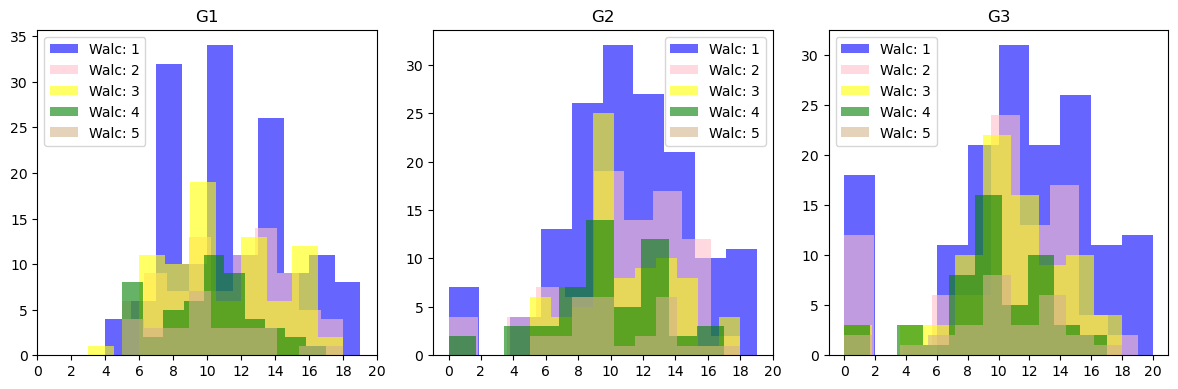

In [20]:
g_cols = ['G1', 'G2', 'G3']

plt.figure(figsize=(12,4))
for i, col in enumerate(g_cols):
    plt.subplot(1, 3, i+1)
    plt.tight_layout(pad=1.1)
    # plotting histogram associated with each `Walc` value
    plt.hist(x= df[df['Walc'] == 1][col], color='blue', alpha=0.6, label='Walc: 1')
    plt.hist(x= df[df['Walc'] == 2][col], color='pink', alpha=0.6, label='Walc: 2')
    plt.hist(x= df[df['Walc'] == 3][col], color='yellow', alpha=0.6, label='Walc: 3')
    plt.hist(x= df[df['Walc'] == 4][col], color='green', alpha=0.6, label='Walc: 4')
    plt.hist(x= df[df['Walc'] == 5][col], color='tan', alpha=0.6, label='Walc: 5')
    plt.xticks(np.arange(0, 21, step=2))
    plt.title(label=col)
    plt.legend()
plt.show()

<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">
اما با استفاده از grouped boxplot میتوان توزیع نمرات را در هر value از ستون Walc با یکدیگر به خوبی مقایسه کرد:
<br>
</div>

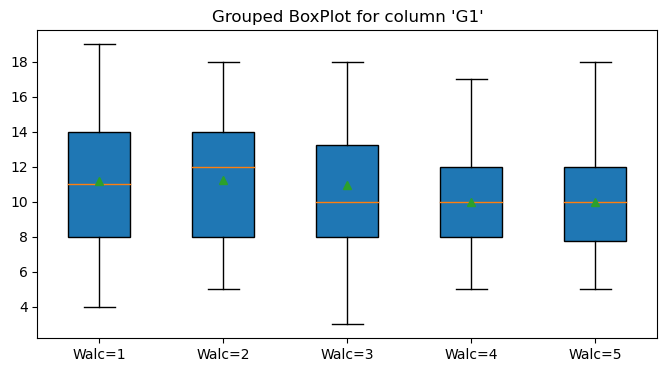

In [21]:
## grouped boxplot
col = 'G1'
plt.figure(figsize=(8,4))
labels = ['Walc=1', 'Walc=2', 'Walc=3', 'Walc=4', 'Walc=5']
data = [df[df['Walc'] == 1][col], df[df['Walc'] == 2][col], df[df['Walc'] == 3][col], df[df['Walc'] == 4][col], df[df['Walc'] == 5][col]]
plt.boxplot(data, labels=labels, showmeans=True, patch_artist=True)
plt.title(f"Grouped BoxPlot for column '{col}'")
plt.show()

<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">
برای ستون G1، پراکندگی داده ها به ازای مصرف الکل کمتر (یعنی مقادیر 1، 2 و 3) تقریبا یکسان است. (IQR یکسان دارند)
مقادیر Walc=4 , Walc=5 نیز IQR مشابه با یکدیگر و البته طول کمتری نسبت به سه مقدار اول در Walc دارد. به این معنی است که پراکندگی نمره ها در دانش آموزانی که مصرف الکل آخر هفته ی بیشتری دارند، کمتر می باشد. 

<br>
در همه ی حالت ها q1=8 است. یعنی در هر دسته (هر میزان مصرف الکل در آخر هفته) 25% نمرات زیر 8 هستند
<br>
اما q3 متفاوت است.
 q3 در دو دسته ی آخر که حدودا 12 می باشد از q3 در دسته های اول دو نمره کمتر است. می تواند نشان دهنده ی این باشد که درصد بیشتری از نمرها در دو دسته ی آخر، کمتر از نمره هادر دسته های با مصرف الکل کمتر است.
<br>
هیچ داده ی پرتی در ارتباط با نمره ی G1 و مصرف الکل در آخر هفته وجود ندارد.

</div>

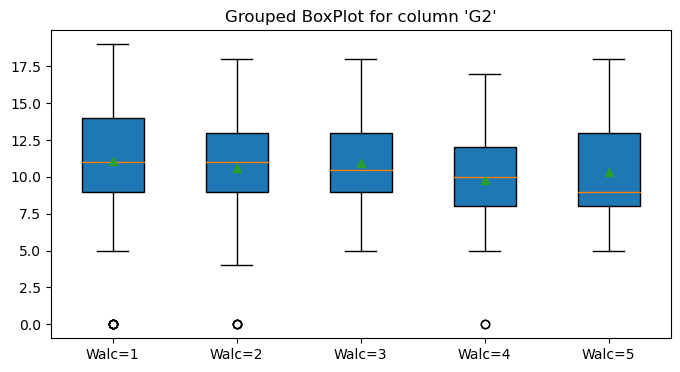

In [22]:
## grouped boxplot
col = 'G2'
plt.figure(figsize=(8,4))
labels = ['Walc=1', 'Walc=2', 'Walc=3', 'Walc=4', 'Walc=5']
data = [df[df['Walc'] == 1][col], df[df['Walc'] == 2][col], df[df['Walc'] == 3][col], df[df['Walc'] == 4][col], df[df['Walc'] == 5][col]]
plt.boxplot(data, labels=labels, showmeans=True, patch_artist=True)
plt.title(f"Grouped BoxPlot for column '{col}'")
plt.show()

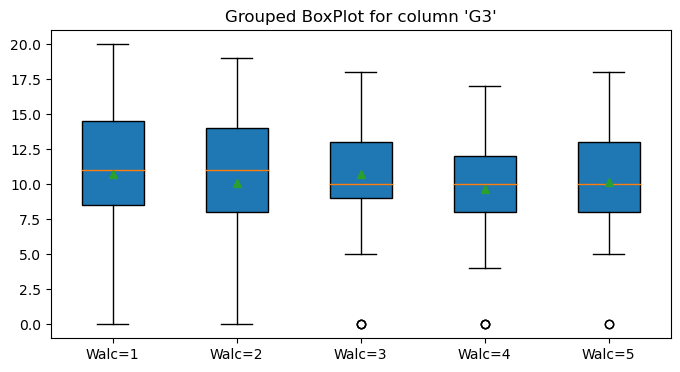

In [23]:
## grouped boxplot
col = 'G3'
plt.figure(figsize=(8,4))
labels = ['Walc=1', 'Walc=2', 'Walc=3', 'Walc=4', 'Walc=5']
data = [df[df['Walc'] == 1][col], df[df['Walc'] == 2][col], df[df['Walc'] == 3][col], df[df['Walc'] == 4][col], df[df['Walc'] == 5][col]]
plt.boxplot(data, labels=labels, showmeans=True, patch_artist=True)
plt.title(f"Grouped BoxPlot for column '{col}'")
plt.show()

<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">
میانگین نمرات در هر دسته از Walc در نمودارها با مثلث سبز نشان داده شده است. مقدار دقیق عددی آنها در ادامه آورده شده است.
<br>
در G1 میانگین نمرات دانش آموزانی که مصرف الکل آخر هفته کمتری داشته اند ، بیشتر بوده است: 
<br>
اما در G3 نمی توان گفت مصرف الکل در آخر هفته بیشتر در کمتر بودن میانگین نمرات اثر زیادی داشته است.
</div>

In [24]:
df.pivot_table(['G1', 'G2', 'G3'],
               ['Walc'],
               aggfunc='mean')

,G1,G2,G3
Walc,,,
1,11.178808,11.052980,10.735099
2,11.270588,10.611765,10.082353
3,10.937500,10.912500,10.725000
4,9.980392,9.764706,9.686275
5,9.964286,10.357143,10.142857


<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">
<h4>بررسی رابطه ی مدت زمان مطالعه هفتگی و نمرات دانش آموزان</h4>
</div>

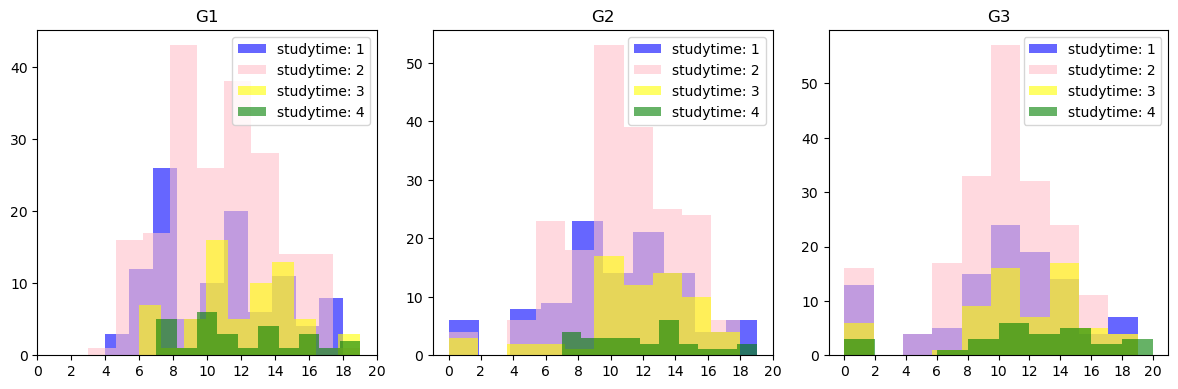

In [25]:
##studytime: 1: <2 hours, 2: 2 to 5 hours, 3: 5 to 10 hours, or 4: >10 hours
g_cols = ['G1', 'G2', 'G3']

plt.figure(figsize=(12,4))
for i, col in enumerate(g_cols):
    plt.subplot(1, 3, i+1)
    plt.tight_layout(pad=1.1)
    # plotting histogram associated with each `studytime` value
    plt.hist(x= df[df['studytime'] == 1][col], color='blue', alpha=0.6, label='studytime: 1')
    plt.hist(x= df[df['studytime'] == 2][col], color='pink', alpha=0.6, label='studytime: 2')
    plt.hist(x= df[df['studytime'] == 3][col], color='yellow', alpha=0.6, label='studytime: 3')
    plt.hist(x= df[df['studytime'] == 4][col], color='green', alpha=0.6, label='studytime: 4')
    plt.xticks(np.arange(0, 21, step=2))
    plt.title(label=col)
    plt.legend()
plt.show()

<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">
<br>
هر چقدر ساعت مطالعه هفتگی بیشتر باشد، میانگین نمرات در هر سه ستون افزایش پیدا کرده است. برای بررسی معنادار بودن این اختلاف ها می توان از تست های آماری مناسب استفاده کرد:
</div>

In [26]:
df.pivot_table(['G1', 'G2', 'G3'],
               ['studytime'],
               aggfunc='mean')

,G1,G2,G3
studytime,,,
1,10.438095,10.276190,10.047619
2,10.651515,10.505051,10.171717
3,12.046154,11.507692,11.400000
4,11.888889,12.037037,11.259259
